In [2]:
%load_ext autoreload

In [24]:
import os, sys, importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULE_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

os.listdir(METRICS_PATH)

['moment_propagation',
 'mc_dropout',
 'test_runs',
 'mc_dropout_max_var_ratio.csv']

In [26]:
sys.path.append(MODULE_PATH)

In [27]:
%autoreload 2
from active_learning import Metrics

DP_METRICS_PATH = os.path.join(METRICS_PATH, "mc_dropout")
MP_METRICS_PATH = os.path.join(METRICS_PATH, "moment_propagation")

dp_metrics = Metrics(DP_METRICS_PATH)
mp_metrics = Metrics(MP_METRICS_PATH)

In [32]:
mp_metrics.BASE_PATH

'/home/exleonem/Desktop/workspace/thesis/wp/notebooks/active learning/../../metrics/moment_propagation'

In [28]:
os.listdir(DP_METRICS_PATH)

['2_mc_dropout_max_entropy.csv',
 '1_mc_dropout_max_entropy.csv',
 '4_mc_dropout_max_entropy.csv',
 '3_mc_dropout_max_entropy.csv']

In [33]:
def get_frame(filename, metrics_reader, astype = {"iteration": "int32", "binary_accuracy": "float32"}):
    data = metrics_reader.read(filename)
    df = pd.DataFrame(data)
    df = df.astype(astype)
    return df

In [62]:
def get_model_name(filename):
    """
        Decodes the model name from the filename
        
        Parameters:
            filename (str): The filename for example 'mc_dropout_max_entropy.csv'
        
        Returns:
            (str) the neural network model name
    """
    
    name, ext = filename.split(".")
    
    if "moment_propagation" in name:
        return "Moment Propagation"
    
    elif "mc_dropout" in name:
        return "MC Dropout"
    
    raise ValueError("No model name encoded in filename: {}".format(name))

In [63]:
def get_acq_name(filename):
    """
        Decodes the acquisition function name from the filename.
        
        Parameters:
            filename (str): The filename for example 'mc_dropout_max_entropy.csv'
        
        Returns:
            (str) the acquisition function name used for the metrics inside the file.
    """
    name, ext = filename.split(".")
    
    if "bald" in name:
        return "BALD"
    
    elif "max_entropy" in name:
        return "Max Entropy"
    
    elif "max_var_ratio" in name:
        return "Var Ratios"
    
    elif "std_mean" in name:
        return "Mean STD"
    
    elif "random" in name:
        return "Random"
    
    raise ValueError("No acquisition function name encoded in filename: {}".format(name))

In [97]:
def load_experiment(num, metrics_path, astype=None):    
    # Filter files
    files = os.listdir(metrics_path)
    files = list(filter(lambda file: str(num) in file, files))
    
    metrics = Metrics(metrics_path)
    main = pd.DataFrame()
    for file in files:
        model_name = get_model_name(file)
        aqf_name = get_acq_name(file)
        
        data = metrics.read(file)
        df = pd.DataFrame(data)
        
        df.insert(2, "Acquisition Function", [aqf_name]*len(data))
        df.insert(3, "Model", [model_name]*len(data))
        
        # Parse types
        if not (astype is None):
            df = df.astype(astype)
        
        main = pd.concat([df, main])
        
    return main

## Experiment 1


| Param | Value
| :--- | :---
| Initial Pool Size | 2
| Step size | 1
| Aquisition function | Max Entropy
| Numpy Seed | 1
| Tensorflow Seed | 2
| Epochs of training | 5
| Iterations | 50

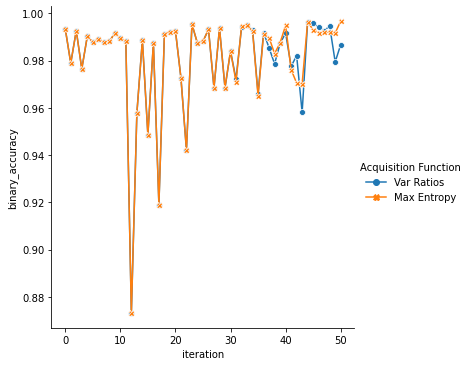

In [115]:
# Read in data of mc dropout expirements and combine frames
dp_exp1 = load_experiment(1, DP_METRICS_PATH, astype={"iteration": "int32", "binary_accuracy": "float32"})
sns.relplot(
    x="iteration", 
    y="binary_accuracy", 
    kind="line", 
    markers=True, 
    dashes=False, style="Acquisition Function", ci=None, hue="Acquisition Function", data=dp_exp1)

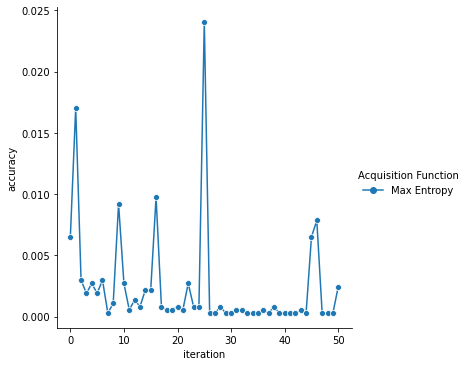

In [111]:
mp_exp1 = load_experiment(1, MP_METRICS_PATH, astype={"iteration": "int32", "accuracy": "float32"})
sns.relplot(x="iteration", y="accuracy", kind="line", markers=True, dashes=False, style="Acquisition Function", ci=None, hue="Acquisition Function", data=mp_exp1)

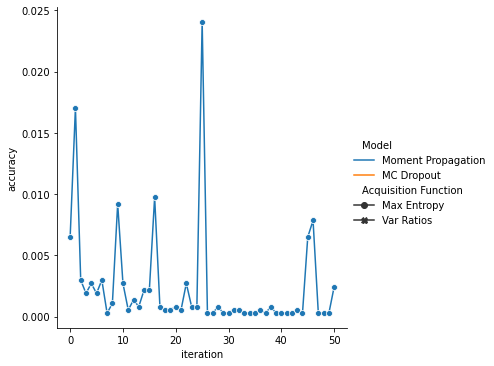

In [123]:
exp1 = pd.concat([mp_exp1, dp_exp1], sort=True)
sns.relplot(x="iteration", y="accuracy", kind="line", markers=True, dashes=False, style="Acquisition Function", ci=None, hue="Model", data=exp1)

## Experiment 2

| Param | Value
| :--- | :---
| Initial Pool Size | 3
| Step size | 5
| Aquisition function | Max Entropy
| Numpy Seed | 1
| Tensorflow Seed | 2
| Epochs of training | 3
| Iterations | 50


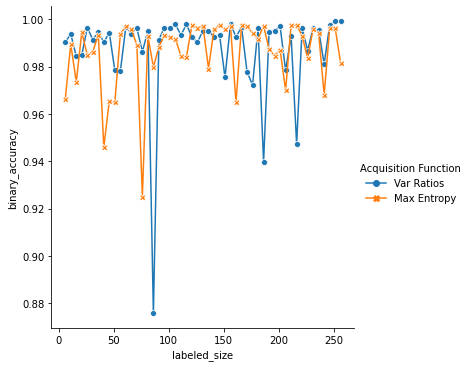

In [127]:
# Load experiments of dropout
dp_exp2 = load_experiment(2, DP_METRICS_PATH, astype={"labeled_size": "int32", "binary_accuracy": "float32"})
sns.relplot(x="labeled_size", y="binary_accuracy", kind="line", markers=True, dashes=False, style="Acquisition Function", ci=None, hue="Acquisition Function", data=dp_exp2)

## Experiment 3

| Param | Value
| :--- | :---
| Initial Pool Size | 3
| Step size | 20
| Aquisition function | Max Entropy
| Numpy Seed | 1
| Tensorflow Seed | 2
| Epochs of training | 3
| Iterations | 50

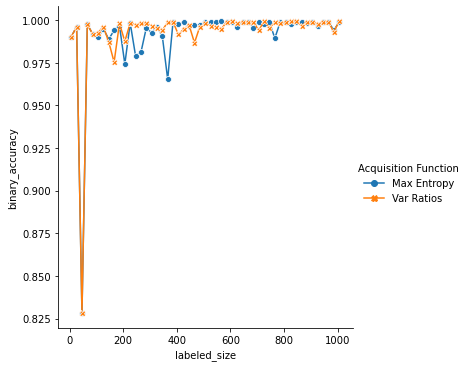

In [128]:
dp_exp3 = load_experiment(3, DP_METRICS_PATH, astype={"labeled_size": "int32", "binary_accuracy": "float32"})
sns.relplot(x="labeled_size", y="binary_accuracy", kind="line", markers=True, dashes=False, style="Acquisition Function", ci=None, hue="Acquisition Function", data=dp_exp3)

## Experiment 4

| Param | Value
| :--- | :---
| Initial Pool Size | 3
| Step size | 50
| Aquisition function | Max Entropy
| Numpy Seed | 1
| Tensorflow Seed | 2
| Epochs of training | 3
| Iterations | 50

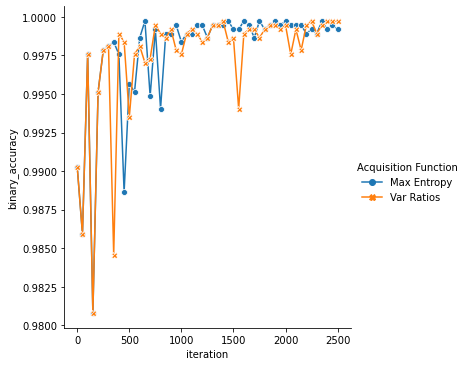

In [102]:
dp_exp4 = load_experiment(4, DP_METRICS_PATH, astype={"iteration": "int32", "binary_accuracy": "float32"})
sns.relplot(x="iteration", y="binary_accuracy", kind="line", markers=True, dashes=False, style="Acquisition Function", ci=None, hue="Acquisition Function", data=dp_exp4)